![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Travailler avec des données ouvertes: Données de kilométrage de voiture, partie 2

Ce cahier utilisera le même ensemble de données de kilométrage de voiture que dans la première partie, mais cette fois, nous démontrerons la puissance de l'agrégation de données. Nous allons introduire des tableaux croisés dynamiques dans Pandas et explorer différentes fonctions d'agrégation. Tout d'abord, réimportons les bibliothèques dont nous avons besoin dans ce cahier et téléchargez à nouveau les données.

In [2]:
# This is the same as the previous notebook! We're just importing the data again
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
url = 'https://data.opendatasoft.com/explore/dataset/us-vehicle-fuel-economy-data-1984-2017@kapsarc/download/?format=csv&timezone=America/Denver&use_labels_for_header=true'
car_data = pd.read_csv(url, sep=';')


# L'agrégation des données pour des graphiques plus informatifs

Les données de kilométrage de la voiture contiennent une colonne temporelle (`year`). Il est souvent intéressant d’observer les changements en fonction du temps. Malheureusement, ces données ne sont pas actuellement organisées de manière à ce que le traçage de nos données en fonction du temps soit immédiatement évident. En utilisant Pandas, nous pouvons utiliser un tableau croisé dynamique pour résumer et agréger les données rapidement et facilement. Si vous avez déjà utilisé un tableau croisé dynamique dans Excel, le concept est identique en Pandas. Les tableaux croisés dynamiques sont utilisés et manipulés un peu différemment au sein de Pandas. Travaillons sur quelques exemples et voyons si nous pouvons trouver quelque chose de plus intéressant dans l'ensemble de données en utilisant un tableau croisé dynamique.

## Faire un tableau croisé dynamique

Pour créer un tableau croisé dynamique, nous n'avons pas besoin de faire quelquechose plus compliqué que ce que nous avons déjà vu. Nous n'aurons pas à faire de travail supplémentaire ou à écrire des centaines de lignes de code. Comme vous le trouverez avec la plupart des choses que vous voulez faire en Python et Pandas: il y a déjà une fonction qui fait exactement ce que vous voulez. Dans la cellule ci-dessous, nous définissons créer un tableau croisé dynamique à partir de notre trame de données `car _data` en utilisant la fonction de Pandas nommée `pivot_table`.

In [3]:
'''
Here we're taking our car data data frame and aggregating it by year, below we explain what each argument does

1. car_data          : Here we're simply passing our source data frame into the piviot table

2. index = 'year'    : Here we're setting the index of our new piviot table. In essence this can be though of 
                       as both the 'index' i.e. what value labels each row uniquely, as well as the 'grouping'
                       term. In this case, we'll see each row labeled by year, and each data point will be 
                       aggregated by which unique year it appeard under

3. aggfunc = 'count' : This is our aggregation function. In this case we're simply choosing to count how many
                       entries happen each year. However, there is no reason that we coudn't aggregate by other
                       quantites such as the mean, median, mode, standard deviation and so on instead. 
                       
4. Special Note      : You may have also noticed that we're not explicitly mentioning what to do with those 'NaN'
                       values we noticed earlier. That is becasue our piviot table will automatically ignore any 
                       NaN values during the aggregation so we don't even have to think about it. Convenient!

'''

pd.pivot_table(car_data, 
                index = 'year',
                aggfunc = 'count')

UCity  UCityA  UHighway  UHighwayA  VClass  atvType  barrels08  \
year                                                                   
1984   1964    1964      1964       1964    1964      199       1964   
1985   1701    1701      1701       1701    1701      158       1701   
1986   1210    1210      1210       1210    1210       71       1210   
1987   1247    1247      1247       1247    1247       56       1247   
1988   1130    1130      1130       1130    1130       31       1130   
1989   1153    1153      1153       1153    1153       33       1153   
1990   1078    1078      1078       1078    1078       29       1078   
1991   1132    1132      1132       1132    1132       39       1132   
1992   1121    1121      1121       1121    1121       23       1121   
1993   1093    1093      1093       1093    1093       14       1093   
1994    982     982       982        982     982       32        982   
1995    967     967       967        967     967       33        967   
1996    773     773       773        773     773       13        773   
1997    762     762       762        762     762       11        762   
1998    812     812       812        812     812       17        812   
1999    852     852       852        852     852       17        852   
2000    840     840       840        840     840       31        840   
2001    911     911       911        911     911       45        911   
2002    975     975       975        975     975       50        975   
2003   1044    1044      1044       1044    1044       62       1044   
2004   1122    1122      1122       1122    1122       81       1122   
2005   1166    1166      1166       1166    1166       77       1166   
2006   1104    1104      1104       1104    1104       60       1104   
2007   1126    1126      1126       1126    1126       85       1126   
2008   1187    1187      1187       1187    1187       92       1187   
2009   1182    1182      1182       1182    1182      132       1182   
2010   1107    1107      1107       1107    1107      145       1107   
2011   1128    1128      1128       1128    1128      207       1128   
2012   1150    1150      1150       1150    1150      222       1150   
2013   1184    1184      1184       1184    1184      249       1184   
2014   1221    1221      1221       1221    1221      249       1221   
2015   1278    1278      1278       1278    1278      210       1278   
2016   1257    1257      1257       1257    1257      189       1257   
2017   1293    1293      1293       1293    1293      177       1293   
2018   1296    1296      1296       1296    1296      172       1296   
2019     40      40        40         40      40        0         40   

      barrelsA08  c240Dscr  c240bDscr      ...       rangeCity  rangeCityA  \
year                                       ...                               
1984        1964         0          0      ...            1964        1964   
1985        1701         0          0      ...            1701        1701   
1986        1210         0          0      ...            1210        1210   
1987        1247         0          0      ...            1247        1247   
1988        1130         0          0      ...            1130        1130   
1989        1153         0          0      ...            1153        1153   
1990        1078         0          0      ...            1078        1078   
1991        1132         0          0      ...            1132        1132   
1992        1121         0          0      ...            1121        1121   
1993        1093         0          0      ...            1093        1093   
1994         982         0          0      ...             982         982   
1995         967         0          0      ...             967         967   
1996         773         0          0      ...             773         773   
1997         762         0          0      ...             762         762   
1998         812     

Maintenant que nous avons un tableau croisé dynamique, faisons quelque chose d'un peu plus intéressant et voyons comment l'économie de carburant moyenne a évolué avec le temps. Nous allons agréger (combiner) nos données en calculant la consommation moyenne de carburant pour toutes les voitures chaque année. Comme on peut le voir dans la cellule ci-dessous, cela peut être accompli en une seule ligne de code en utilisant un tableau croisé dynamique.

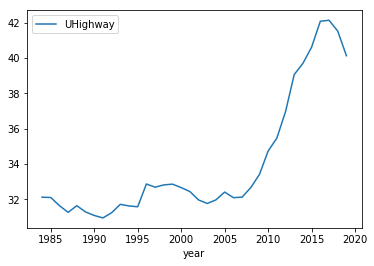

In [4]:
'''
Notice how this time we're not specifying an 'x' axes; this is because we're interested
in plotting this by year, and as it's our index pandas will automatically use it for the unspecifed 
axes. 
'''

pd.pivot_table(car_data,index='year', 
                        aggfunc = 'mean').plot(y = 'UHighway')

Les graphiques résultant de l'agrégation commencent à devenir plus intéressants! Vers 2008, nous constatons une nette augmentation des économies de carburant moyennes de tous les véhicules. Pour obtenir une meilleure image, il est intéressant d’ajouter des mesures de variation à ces graphiques. Comme nous l'avons agrégé par moyenne, il est prudent d'inclure également la moyenne plus et moins l'écart-type dans ce graphique. Nous notons que la moyenne et l'écart type ne sont pas les meilleurs indicateurs pour des données comme celle-ci, car il est probable que les choses ne sont pas distribuées normalement. À des fins de démonstration comme celle-ci, il est plus que suffisant d'utiliser la moyenne et l'écart type pour la simplicité et l'exploration.

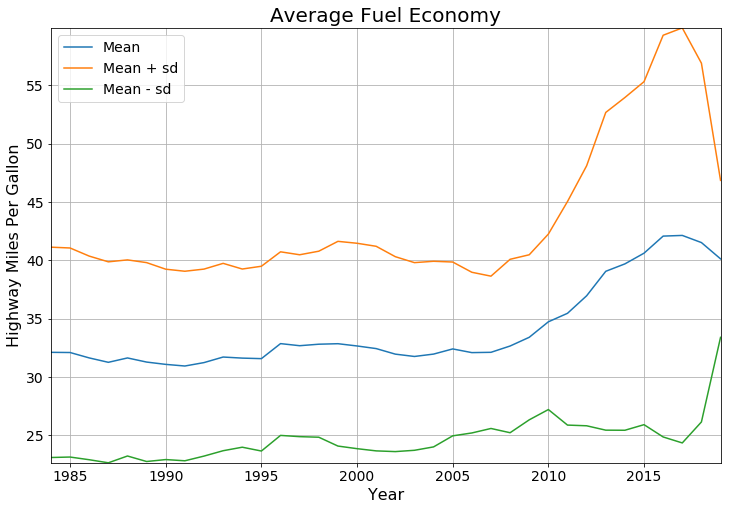

In [10]:
# This time we're giving both our mean and standard deviation names that we can call later
# Unfortunately, we're not very creative so we're simply calling the mean 'a' and standard
# deviation 'b'.

a = pd.pivot_table(car_data,index ='year', 
                   aggfunc = 'mean')

b = pd.pivot_table(car_data,index ='year', 
                   aggfunc = 'std')

# Here we're naming our plot 'ax' for axes 

my_plot = a.plot(y = 'UHighway', label="Mean", figsize = (12,8))


'''
There's a lot going on in the two lines of code below, so let's take a moment to understand them

1. When we type (a + b), we're actually adding our dataframes together element-by-element. This is 
   possible because a and b have identical column names and sizes. When we wrap them in parenthesis,
   the .plot command will see that as a single data frame. We could have also specified something like
       
       Plus_one_sd = a + b
       Plus_one_sd.plot( ... )
    
    However, sometimes it's easier to just do things in a single line. 

2. Also specifying ax=my_plot. This tells Python to place these new traces on the same picture as 
   'my_plot', or the plot of the mean we did in the line before this. 

3. By just doing mean +/- standard deviation, we are assuming symmetric uncertainties, and this may not
   be the case in the actual data. But, for our purposes, it's likely more than adequate. 
'''

(a + b).plot(ax = my_plot, y = 'UHighway', label = "Mean + sd") 
(a - b).plot(ax = my_plot, y= 'UHighway', label = "Mean - sd")

plt.title("Average Fuel Economy", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Highway Miles Per Gallon", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight = True)  
plt.legend(fontsize = 14) # Change font size of legend

En agrégeant les données et en observant les variations qui en résultent, une image beaucoup plus intéressante commence à apparaître. L'année 2010 a été marquée par une tendance à la hausse du rendement de comburant moyen, qui a atteint son sommet en 2017 avant de commencer à diminuer. En 2019 (les données les plus récentes), l'écart type de l'ensemble de données montre une diminution significative. Cela implique qu'il y a moins de variation dans les données pour les modèles de voitures 2019. Il pourrait y avoir plusieurs raisons de cette tendance et de l'étrangeté de 2019. Peut-être y a-t-il plus de véhicules avec des moteurs plus gros fabriqués en 2019? Peut-être qu'il manque des données? Ou peut-être quelque chose de complètement différent. Il y a beaucoup de raisons potentielles. Voyons s'il y a un argument plus fort que la spéculation en utilisant certaines des compétences que nous avons déjà utilisées (et en en introduisant une autre)

## Une analyse approfondie

En ce qui concerne le rendement de comburant, le nombre de cylindres dans le moteur est le signe le plus révélateur d'un véhicule plus ou moins économe en carburant. Un moteur avec plus de cylindres utilisera plus d'essence qu'un moteur avec moins. Dans ce cas, l'une des choses que nous pouvons faire est de regrouper nos données par année _et_ par nombre de cylindres. Ceci est fait dans le code ci-dessous.

In [22]:
double_grouping = pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],  # Here we specify that we want to index (group) our data
                                                # by year *and* number of cylinders
                aggfunc = 'count')              # Aggregate by count

double_grouping.head(10)                         # .head(10) wil only display the first 10 rows

UCity  UCityA  UHighway  UHighwayA  VClass  atvType  \
year cylinders                                                        
1984 2.0            6       6         6          6       6        0   
     4.0         1020    1020      1020       1020    1020       79   
     5.0           39      39        39         39      39        2   
     6.0          457     457       457        457     457       23   
     8.0          439     439       439        439     439       95   
     12.0           3       3         3          3       3        0   
1985 2.0            5       5         5          5       5        0   
     3.0            6       6         6          6       6        0   
     4.0          853     853       853        853     853       60   
     5.0           20      20        20         20      20        6   

                barrels08  barrelsA08  c240Dscr  c240bDscr      ...       \
year cylinders                                                  ...        
1984 2.0                6           6         0          0      ...        
     4.0             1020        1020         0          0      ...        
     5.0               39          39         0          0      ...        
     6.0              457         457         0          0      ...        
     8.0              439         439         0          0      ...        
     12.0               3           3         0          0      ...        
1985 2.0                5           5         0          0      ...        
     3.0                6           6         0          0      ...        
     4.0              853         853         0          0      ...        
     5.0               20          20         0          0      ...        

                rangeCity  rangeCityA  rangeHwy  rangeHwyA  sCharger  \
year cylinders                                                         
1984 2.0                6           6         6          6         0   
     4.0             1020        1020      1020       1020         0   
     5.0               39          39        39         39         0   
     6.0              457         457       457        457         0   
     8.0              439         439       439        439         0   
     12.0               3           3         3          3         0   
1985 2.0                5           5         5          5         0   
     3.0                6           6         6          6         0   
     4.0              853         853       853        853         0   
     5.0               20          20        20         20         0   

                startStop  tCharger  trans_dscr  trany  youSaveSpend  
year cylinders                                                        
1984 2.0                0         0           0      6             6  
     4.0                0       107           0   1020          1020  
     5.0                0         6           0     39            39  
     6.0                0        14          17    456           457  
     8.0                0         0          37    438           439  
     12.0               0         0           0      3             3  
1985 2.0                0         0           0      5             5  
     3.0                0         0           0      6             6  
     4.0                0       131         225    853           853  
     5.0                0         9           7     20            20  

[10 rows x 81 columns]

Où nous voyons que nous avons maintenant deux groupes: D'abord, nos données sont regroupées par année, puis elles sont regroupées par le nombre de cylindres dans le moteur. Malheureusement, cette base de données n'est pas actuellement sous une forme que notre bibliothèque de traçage connait comment traiter; nous avons deux indices de colonne, le nombre de cylindres et les années, ce qui signifie que notre bibliothèque graphique ne saura pas comment traiter les données. Heureusement, nous pouvons le convertir en une forme que notre bibliothèque graphique appréciera davantage en utilisant la fonction `unstack()` qui «pivotera» notre tableau croisé dynamique pour qu'il soit plus facile à tracer.

In [25]:
'''
Here the unstack() function with no arguments in its parenthesis pivot our pivot table 
into a form that can be more easily plotted.
'''

double_grouping.unstack().head()

UCity                                                  UCityA ...   \
cylinders  2.0   3.0     4.0   5.0    6.0    8.0  10.0 12.0 16.0   2.0  ...    
year                                                                    ...    
1984        6.0   NaN  1020.0  39.0  457.0  439.0  NaN  3.0  NaN    6.0 ...    
1985        5.0   6.0   853.0  20.0  462.0  351.0  NaN  2.0  NaN    5.0 ...    
1986        1.0   9.0   592.0  18.0  323.0  263.0  NaN  3.0  NaN    1.0 ...    
1987        3.0  11.0   625.0  26.0  296.0  282.0  NaN  4.0  NaN    3.0 ...    
1988        3.0  13.0   526.0  17.0  325.0  241.0  NaN  5.0  NaN    3.0 ...    

          trany youSaveSpend                                                   
cylinders  16.0         2.0   3.0     4.0   5.0    6.0    8.0  10.0 12.0 16.0  
year                                                                           
1984        NaN          6.0   NaN  1020.0  39.0  457.0  439.0  NaN  3.0  NaN  
1985        NaN          5.0   6.0   853.0  20.0  462.0  351.0  NaN  2.0  NaN  
1986        NaN          1.0   9.0   592.0  18.0  323.0  263.0  NaN  3.0  NaN  
1987        NaN          3.0  11.0   625.0  26.0  296.0  282.0  NaN  4.0  NaN  
1988        NaN          3.0  13.0   526.0  17.0  325.0  241.0  NaN  5.0  NaN  

[5 rows x 729 columns]

Où cela est maintenant dans une forme que nous pouvons tracer. Il pourrait être intéressant de commencer par visualiser le nombre de voitures produites avec différents nombres de cylindres par an, ce qui est fait ci-dessous.

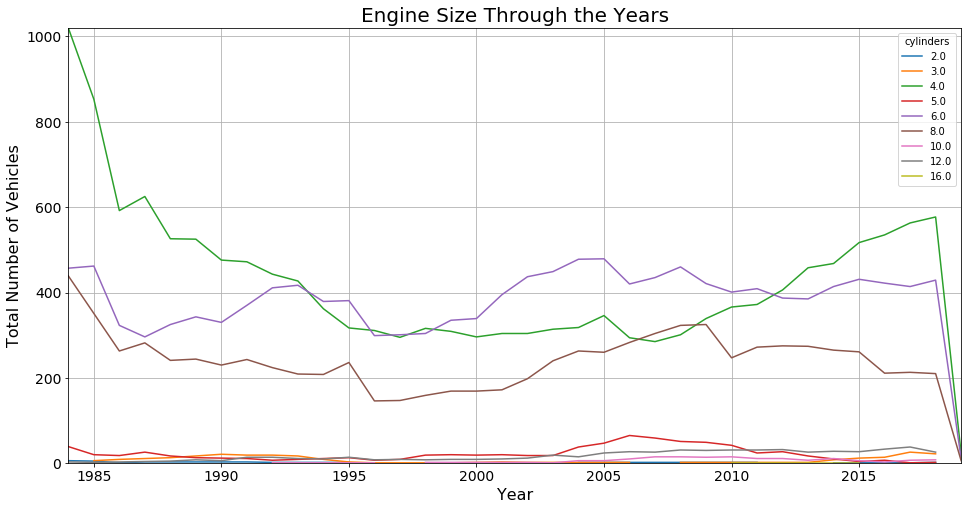

In [7]:
'''
Note we're doing all the previously shown manipulations in one line instead of using the variable we created 
earlier for illustrative purposes. This simply because it's more convenient to work with like this when you're
potentialy changing what values you're sorting/how your aggregating. 
'''

pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],
                aggfunc = 'count').unstack().plot(kind='line', y = "model", figsize = (16,8))

plt.title("Engine Size Through the Years", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Total Number of Vehicles", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight=True)  


Ah ha! Donc, notre écart-type décroissant en 2019 n'est pas en fait «réel» - il s'agit simplement d'une conséquence de données manquantes en 2019. Plus intéressant, est-ce qu'à partir de 2009, le nombre de moteurs à quatre cylindres a augmenté . Serait-ce la raison de l'augmentation de la consommation moyenne de carburant sur les autoroutes? Découvrons en agrégeant par la moyenne pour chaque type de moteur.

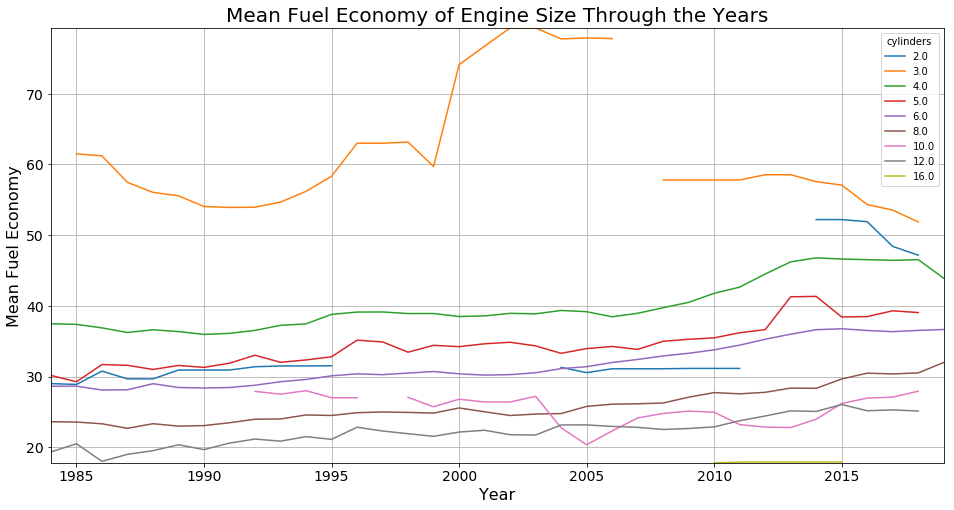

In [8]:
pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],
                aggfunc = 'mean').unstack().plot(kind='line', y = "UHighway", figsize = (16,8))

plt.title("Mean Fuel Economy of Engine Size Through the Years", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Mean Fuel Economy", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight=True)  




Intéressant. En comparant les deux graphiques ci-dessus, il apparaît que, même si presque tous les types de moteurs sont devenus plus économes en carburant, ces gains d’efficacité sont mineurs. Seulement environ 10 MPG. Ce qui est plus intéressant, c’est qu’il ya plus de véhicules à quatre cylindres produits depuis 2010. Cela témoigne peut-être d’une évolution vers la demande de véhicules plus économes en carburant. Il est possible de quantifier quels véhicules contribuent le plus à ce gain de rendement énergétique. Cette analyse nécessite la normalisation des données et est laissée pour une autre fois. Indépendamment de cela, en utilisant les compétences que vous avez déjà apprises dans ce cahier en filtrant et en agrégeant les tableaux de données dans un tableau croisé dynamique, vous pouvez commencer votre propre analyse en comparant quels constructeurs automobiles créent les véhicules les plus économes en carburant. Ou, vous pouvez explorer tous les aspects que vous trouvez intéressants.

# Conclusion

Dans ce cahier, nous avons parcouru quelques exemples plus avancés de la façon de travailler avec de grands ensembles de données ouverts comme celui-ci. Nous avons utilisé la puissance des tableaux croisés dynamiques pour agréger nos données à la fois par comptage et par moyenne. Nous vous avons montré des outils puissants à votre disposition pour explorer de vastes quantités de données afin de commencer à tirer des conclusions de l'ensemble de données. Les compétences que vous avez acquises ici peuvent être tranférés dans d’autres projets où l’agrégation des données peut s’avérer inestimable.

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)